<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

## Project Title: Telco Customer Churn Prediction Using Machine Learning Models

## Project Description: To build a model that accurately predicts customer churn

## Hypothesis

### Null Hypothesis: Customers churn based on Online Security, Tech Support and Total Charges

### Alternate Hypothesis: Customers do not churn based on Online Security, Tech Support and Total Charges

## Questions

### 1. Do customers who have subscribed to online security from the company likely to churn?

### 2. How does the length of a customer's contract affect their likelihood to churn?

### 3. How do customers' total monthly charges impact their decision to churn?

### 4. Does the payment method contribute to why customers churn?
 
### 5. What is the rate of customer churn concerning the billing method?

### 6. Is there a relation between total charges and the likelihood of customers churning?




# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...

In [2]:
#!pip install category_encoders

In [3]:
#!pip install imbalanced-learn --upgrade

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [157]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import category_encoders as ce
from imblearn.over_sampling import SMOTE

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import classification_report 

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV

# Other packages
import os

import warnings
warnings.filterwarnings("ignore")

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [150]:
# For CSV, use pandas.read_csv
data=pd.read_csv('Telco-Customer-Churn.csv')

In [6]:
#displaying max columns
# pd.set_option('display.max_columns', None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#checking shape of data
data.shape

(7043, 21)

In [8]:
#checking duplicates
data.duplicated().sum()

0

In [9]:
#checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
#checking null values in each column
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#totalcharges column has datatype object, let's convert to float
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
tc_df = data[data['TotalCharges'].isnull()]
tc_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
def impute_charges(row):
    if row.TotalCharges is  None:
        value = row.tenure.astype(int) * row.MonthlyCharges.astype(int)
        return value
        

In [14]:
tc_df['TotalCharges'] = tc_df.apply(impute_charges, axis=1)

In [15]:
tc_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,None,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,None,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,None,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,None,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,None,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,None,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,None,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,None,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,None,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,None,No


In [16]:
#creating a function to find all unique values in the categorical dataframe
def unique_vals(cat_columns_df):
    unique_vals_dict={}
    for cols in cat_columns_df.columns:
        unique_vals_dict[cols]=cat_columns_df[cols].unique().tolist()
    return unique_vals_dict    
    

In [17]:
data.fillna(data['TotalCharges'].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [18]:
#creating a new dataframe containing only categorical data
cat_columns_df=data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]
cat_columns_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [19]:
#calling function to return unique values
unique_values = unique_vals(cat_columns_df)

for cols, values in unique_values.items():
    print(f"{cols}:{values}")

gender:['Female', 'Male']
SeniorCitizen:[0, 1]
Partner:['Yes', 'No']
Dependents:['No', 'Yes']
PhoneService:['No', 'Yes']
MultipleLines:['No phone service', 'No', 'Yes']
InternetService:['DSL', 'Fiber optic', 'No']
OnlineSecurity:['No', 'Yes', 'No internet service']
OnlineBackup:['Yes', 'No', 'No internet service']
DeviceProtection:['No', 'Yes', 'No internet service']
TechSupport:['No', 'Yes', 'No internet service']
StreamingTV:['No', 'Yes', 'No internet service']
StreamingMovies:['No', 'Yes', 'No internet service']
Contract:['Month-to-month', 'One year', 'Two year']
PaperlessBilling:['Yes', 'No']
PaymentMethod:['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn:['No', 'Yes']


In [20]:
# change SeniorCitizen values from 0 and 1 to 'No' and 'Yes'
data['SeniorCitizen']=data['SeniorCitizen'].map({0:'No', 1:'Yes'})
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [22]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Hypothesis Testing

In [23]:
contingency_data = pd.crosstab(data['OnlineSecurity'], data['Churn'])
contingency_data

Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


In [24]:
from scipy.stats import chi2_contingency

In [25]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print(f'stat={stat:.3f}, p={p:.3f}')

stat=849.999, p=0.000


## Univariate Analysis

###  Visualizing all categorical columns

In [26]:
def plot_categorical_columns(data):
    """
    Plot countplots for all categorical columns in a dataset.

    Parameters:
    data (pandas.DataFrame): The dataset to plot.

    Returns:
    None
    """
    data = data.drop(columns=['customerID'])
    # Get list of categorical columns
    cat_cols = data.select_dtypes(include='object').columns.tolist()

    # Loop through categorical columns and plot countplot
    for col in cat_cols:
        column_count = data[col].value_counts()
        sns.countplot(data=data, x=col)
        plt.title(f'Values in the {col} columns', pad=10, fontsize='large')
        plt.show()
    
#         for i in range((column_count.shape[0])):
#             count = column_count[i]
#             pct_str = '{0}'.format(count)
#             plt.text(i, count+300, pct_str, ha = 'center', fontsize='large')
        


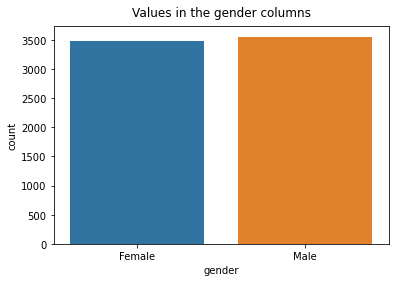

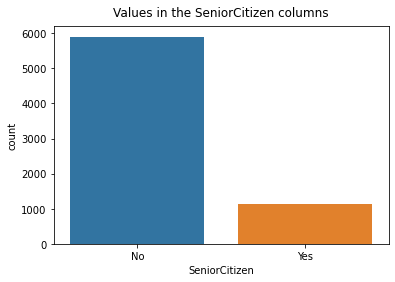

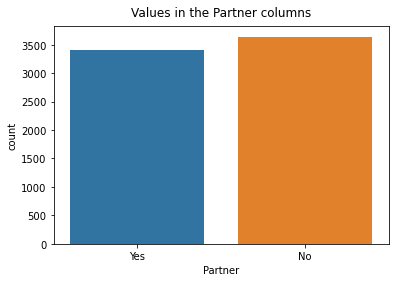

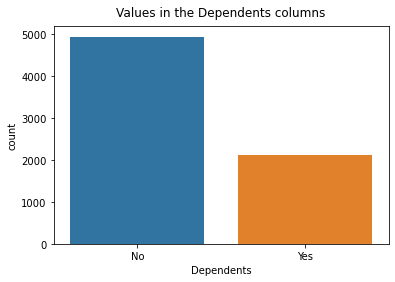

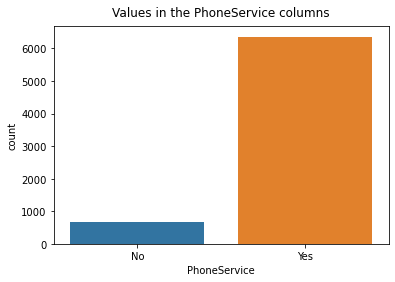

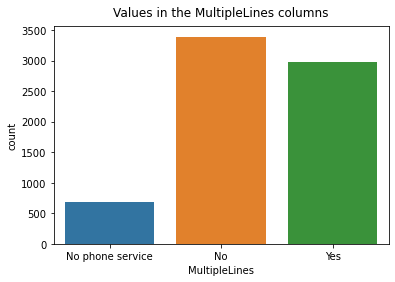

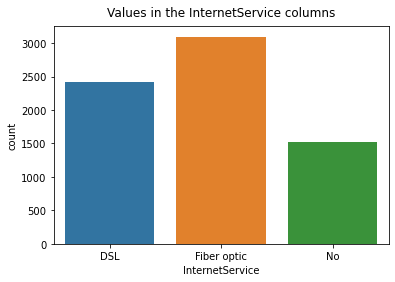

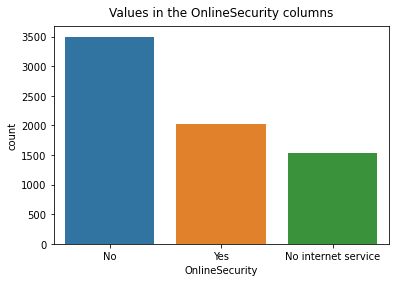

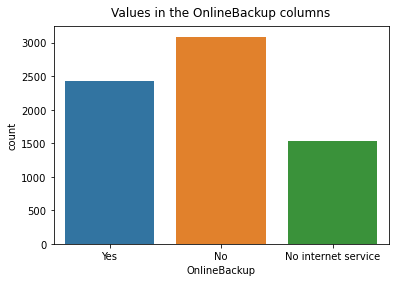

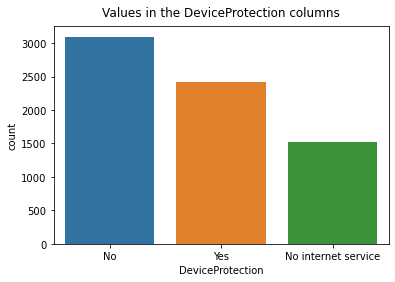

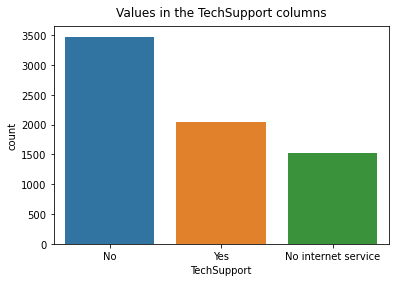

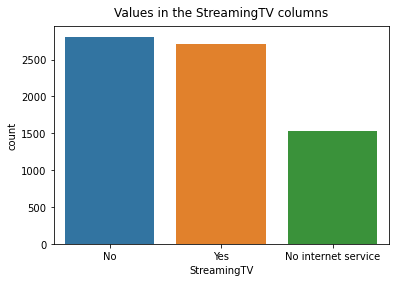

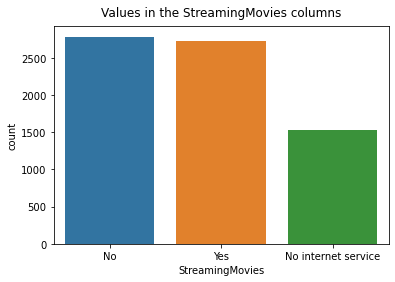

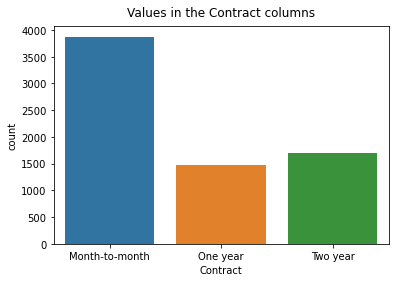

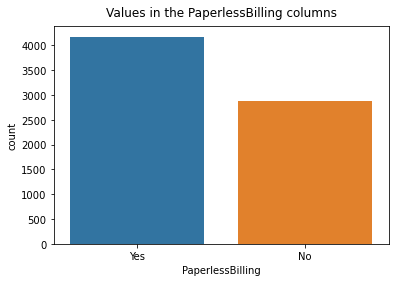

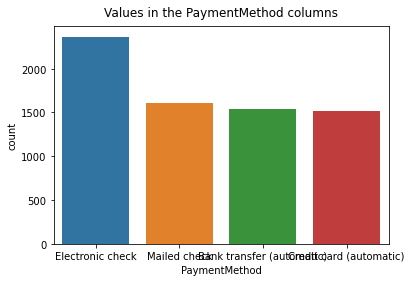

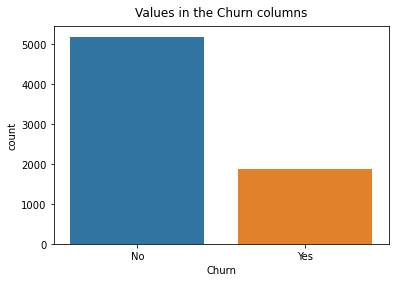

In [27]:
plot_categorical_columns(data)

>- The male gender dominated the use of telco services with a total of 3555 againt 3488 of the female gender
>-  The total of Senior Citizens who use telco services are few with a total of 1142 compared to those who aren't senior citizens
>- Customers without partners who use telco services are more with a total of 3641 than those who have partners.
>- Few customers have dependants with a total of 2110 compared to those without dependants (4933)
>- Customers who use phone services are more with a total of 6361 compared to those who don't use phone services(682)
>- The number of customers who don't use multiple lines (3390) exceed those who use (2971) and those who have no phone service(682)
>- Customers tend to enjoy the use of fiber optic (3096) as a source of internet service than DSL (2421). Meanwhile, others (1526) have no internet service
>- Customers with No online security (3498) exceed those who have (2019) and those with no internet service(1526)
>- Customers with online backup (2429) are less than those without online backup (3088) while quite a number had no internet service (1526)
>- Customers without device protection (3095) were more than those who had (2422) and those who had no internet service(1526)
>- Customers who didn't recieve tech support (3473) were more than those who had (2044) and those with no internet service(1526)
>- Customers who didn't use Telco services to stream tv (2810) were a little above those who did (2707). Meanwhile some had no internet service to stream tv (1526)
>- Customers who didn't use Telco services to stream movies (2785) were a little above those who did (2732). Meanwhile some had no internet service to stream movies (1526)
>- Customers who had subscribed for a month-to-month (3875) telco services were more than those with two years(1695) and  one year (1473) subscription
>- The total customers who used paperless billing system (4171) were more than those who did not (2872)
>- Customers tend to use the electronic check (2365) payment method more than the other payment methods which are  mailed check (1612),  bank transfer (automatic) (1544)  and credit card (automatic) (1522).
>- Customers who churn (1869) are less than those who do not (5174)

## Answering Research Questions

### 1. Do customers who have subscribed to online security from the company likely to churn?

In [151]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [152]:
#Churn based on online security
label=data['OnlineSecurity'].unique()
value=data['OnlineSecurity'].value_counts()

fig=go.Figure(data=[go.Pie(labels=label, values=value)])
fig.show()    

In [153]:
fig = px.histogram(data, x="OnlineSecurity", color="Churn", title="Customer Churn Based on OnlineSecurity")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

>- With regards to OnlineSecurity, customers will either churn or not churn based on whether they have subscribed to the service. From the visualization, it can be seen that customers with no OnlineSecurity are not churning, same for those with OnlineSecurity and those with no internet service.
>- We can say that customers do not churn based on OnlineSecurity services by the Telco Company. 

### Bivariate Analysis

### 2. How does the length of a customer's contract affect their likelihood to churn?

In [163]:
fig = px.histogram(data, x="Contract", color="Churn", title="Customer Churn Based on Contract")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

>- It can be seen that customers with two years contract are not churning.
Hence, the length of a customers contract does not affect likelihood to churn    

### 3. How do customers' total monthly charges impact their decision to churn?

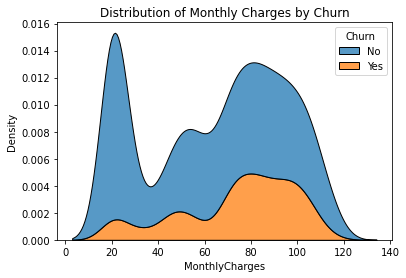

In [164]:
sns.kdeplot(data=data, x="MonthlyCharges", hue="Churn", multiple='stack')
plt.title('Distribution of Monthly Charges by Churn');

>- Customers whith high monthly charges do not churn.
>- Hence, the total monthly charges does not impact their decision to churn.

### 4.  Does the payment method contribute to why customers churn?

In [165]:
fig = px.histogram(data, x="PaymentMethod", color="Churn", title="Customer Churn Based on Payment Method")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

>- Customers are not likely to churn based on payment method

### 5. What is the rate of customer churn concerning the billing method?

In [166]:
fig = px.histogram(data, x="PaperlessBilling", color="Churn", title="Customer Churn Based on PaperlessBilling")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

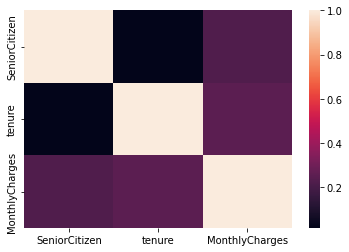

In [167]:
#visualizing correlation between numerical columns in dataset
sns.heatmap(data.corr());

### 6. Is there a relation between total charges and the likelihood of customers churning?

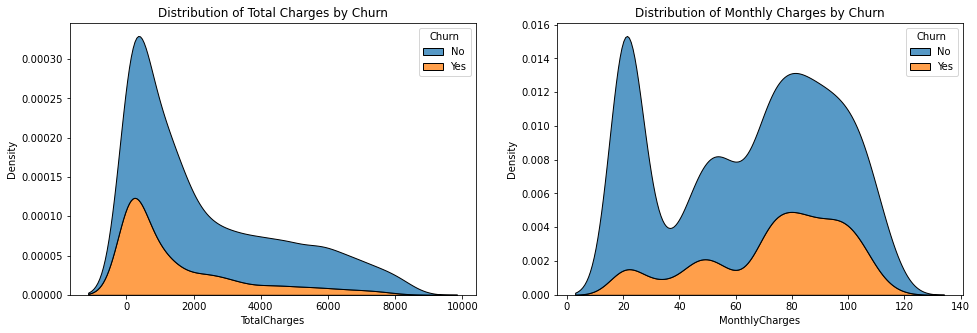

In [40]:
plt.figure(figsize=[16, 5])
plt.subplot(1,2, 1)
sns.kdeplot(data=data, x="TotalCharges", hue="Churn", multiple='stack')
plt.title('Distribution of Total Charges by Churn')

plt.subplot(1,2, 2)
sns.kdeplot(data=data, x="MonthlyCharges", hue="Churn", multiple='stack')
plt.title('Distribution of Monthly Charges by Churn');
plt.show()

>- Yes, there is a relation but it's very small.
>- Customers whith high total charges do not churn compared to those with less total charges. This may be due to the services those with high total charges are receiving.

**From the EDA performed we realized that the data is imbalanced since the number of customers who aren't churning made up the majority of the dataset.**

In dealing with this issue: 

1. All other evaluation metrics will be used except 'accuracy' since it will be in favour of the majority class
2. The type of machine learning algorithms that will be used are the Tree based models and other regression models.
3. SMOTE technique will be used to balance the data.


# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [48]:
# Use pandas.DataFrame.drop_duplicates method
data.duplicated().sum()

0

>- There are no duplicates in the train data

In [49]:
# display columns in dataframe
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Dataset Splitting

In [50]:
# display churn column
data = data.drop(columns=['customerID'])
data['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [51]:
#  change values in churn column into numerical data
data['Churn'] = (data['Churn'] == 'Yes').astype(bool).astype(int)
data['Churn'].unique()

array([0, 1])

In [52]:
# Use train_test_split with a random_state, and add stratify for Classification

#spliting data into  80% train and  20% test

train, test = train_test_split(data, test_size=0.2, random_state=42)

In [53]:
# check and confirm the shape of the train and test data
train.shape, test.shape

((5634, 20), (1409, 20))

In [54]:
# create features and targets from the train and test
X_train = train.drop(columns=['Churn'])
y_train = train['Churn'].copy()

X_test = test.drop(columns=['Churn'])
y_test = test['Churn'].copy()


In [55]:
# display head fo the train features dataframe
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,Female,No,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1623,Female,No,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,Male,No,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,Male,No,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN


In [56]:
# displayhead for the test features dataframe

X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,Female,No,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80
2715,Male,No,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
3825,Female,No,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70
1807,Female,No,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
132,Male,No,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10


## New Features Creation

In [57]:
# filter and display dataframe where totalcharges is null
data[data['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [58]:
X_train['Monthly Variations'] = (X_train.loc[:, 'TotalCharges']) -((X_train.loc[:, 'tenure'] * X_train.loc[:, 'MonthlyCharges']))
X_test['Monthly Variations'] =  (X_test.loc[:, 'TotalCharges']) - ((X_test.loc[:, 'tenure'] * X_test.loc[:, 'MonthlyCharges']))

In [59]:
labels =['{0}-{1}'.format(i, i+2) for i in range(0, 73, 3)]
X_train['tenure_group'] = pd.cut(X_train['tenure'], bins=(range(0, 78, 3)), right=False, labels=labels)
X_test['tenure_group'] = pd.cut(X_test['tenure'], bins=(range(0, 78, 3)), right=False, labels=labels)

print(labels)

['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23', '24-26', '27-29', '30-32', '33-35', '36-38', '39-41', '42-44', '45-47', '48-50', '51-53', '54-56', '57-59', '60-62', '63-65', '66-68', '69-71', '72-74']


In [60]:
X_train.drop(columns='tenure', inplace=True)
X_test.drop(columns='tenure', inplace=True)

## Create Pipeline to Impute Missing Values, Encode columns and Scale Columns

In [61]:
# Use sklearn.impute.SimpleImputer

In [62]:
# check the number of misssing values in the train data
X_train.isnull().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          10
Monthly Variations    10
tenure_group           0
dtype: int64

In [63]:
X_train[X_train.tenure_group.isnull()]        

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Monthly Variations,tenure_group


In [64]:
# select the categorical columns from train and test data for encoding
train_cat_cols = X_train.select_dtypes(include=['object', 'category']).columns
test_cat_cols = X_test.select_dtypes(include=['object', 'category']).columns

In [65]:
# coonfirm if categorical columns are same for test and train data
train_cat_cols == test_cat_cols

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [66]:
# select numerical columns from the train and test dataset
train_num_cols=X_train.select_dtypes(exclude=['object', 'category']).columns
test_num_cols=X_test.select_dtypes(exclude=['object', 'category']).columns
test_num_cols, train_num_cols

(Index(['MonthlyCharges', 'TotalCharges', 'Monthly Variations'], dtype='object'),
 Index(['MonthlyCharges', 'TotalCharges', 'Monthly Variations'], dtype='object'))

In [67]:
# create variables to hold numerical and categorical columns 
num_attribs = list(train_num_cols)
cat_attribs = train_cat_cols

In [68]:
#create a numerical pipeline to standardize and impute the missinf in the numerical columns
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy="constant", fill_value=0)),('std_scaler', StandardScaler())])

#create a categorical pipeline to encode and impute the missing in the numerical columns
cat_pipeline = Pipeline([('imputer',SimpleImputer(strategy="most_frequent")),('cat_encoder', OneHotEncoder())])

In [69]:
# Create a fullpipeline by combining numerical and catagorical pioeline
full_pipeline = ColumnTransformer([("numerical",num_pipeline, num_attribs), ("categorical",cat_pipeline, cat_attribs) ], remainder='passthrough')

In [70]:
# use create pipeline to transform train and test features
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.fit_transform(X_test)

In [71]:
X_test_prepared

<1409x71 sparse matrix of type '<class 'numpy.float64'>'
	with 28180 stored elements in Compressed Sparse Row format>

In [72]:
# convert to dataframe
# X_train_ = pd.DataFrame(X_train_prepared.toarray(), columns=)

In [73]:
# get categorical columns after transformation
cat_features = full_pipeline.named_transformers_['categorical']['cat_encoder'].get_feature_names()
cat_features

array(['x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_No', 'x2_Yes',
       'x3_No', 'x3_Yes', 'x4_No', 'x4_Yes', 'x5_No',
       'x5_No phone service', 'x5_Yes', 'x6_DSL', 'x6_Fiber optic',
       'x6_No', 'x7_No', 'x7_No internet service', 'x7_Yes', 'x8_No',
       'x8_No internet service', 'x8_Yes', 'x9_No',
       'x9_No internet service', 'x9_Yes', 'x10_No',
       'x10_No internet service', 'x10_Yes', 'x11_No',
       'x11_No internet service', 'x11_Yes', 'x12_No',
       'x12_No internet service', 'x12_Yes', 'x13_Month-to-month',
       'x13_One year', 'x13_Two year', 'x14_No', 'x14_Yes',
       'x15_Bank transfer (automatic)', 'x15_Credit card (automatic)',
       'x15_Electronic check', 'x15_Mailed check', 'x16_0-2', 'x16_12-14',
       'x16_15-17', 'x16_18-20', 'x16_21-23', 'x16_24-26', 'x16_27-29',
       'x16_3-5', 'x16_30-32', 'x16_33-35', 'x16_36-38', 'x16_39-41',
       'x16_42-44', 'x16_45-47', 'x16_48-50', 'x16_51-53', 'x16_54-56',
       'x16_57-59', 'x16_6-8', 'x16_6

In [74]:
# Create a new datframe for the train and test feature
labels = np.concatenate([train_num_cols, cat_features])
X_train_ = pd.DataFrame(X_train_prepared.toarray(), columns=labels)
X_test_ = pd.DataFrame(X_test_prepared.toarray(), columns=labels)

## Optional: Train Dataset Balancing 

In [75]:
# Count the number of unique values in the target
y_train.value_counts()

0    4138
1    1496
Name: Churn, dtype: int64

In [76]:
# import the SMOTE technique to oversample the minority
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [77]:
# Create an instance of SMOTE and fit it on the train feature and targets
sm = SMOTE(sampling_strategy='minority')
X_train_, y_train = sm.fit_resample(X_train_, y_train)

In [174]:
# let's confirm the increase in rows after oversampling
len(X_train_), len(y_train)

(8276, 8276)

In [79]:
# Confirm values counts for the targets
y_train.value_counts()

0    4138
1    4138
Name: Churn, dtype: int64

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Model 1 - Decision Tree

Please, keep the following structure to try all the model you want.

### Create the Model

In [80]:

from sklearn.tree import DecisionTreeClassifier
# let's create a decision tree model
dtree = DecisionTreeClassifier(criterion='gini', random_state=100, min_samples_leaf=8, max_depth=6 )

### Train the Model

In [81]:
# Use the .fit method to train the model
dtree.fit(X_train_, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [82]:
def evaluate_model(model, test, y_true):
    # Compute the valid metrics for the use case # Optional: show the classification report
    pred = model.predict(test)
    F1 = f1_score(y_true, pred)
    accuracy = accuracy_score(y_true, pred)
    precision = precision_score(y_true, pred)
    recall = recall_score(y_true, pred)
    F2 = fbeta_score(y_true, pred, beta=2.0)
 
    print("classification report : \n", classification_report(y_true, pred))
    cf = confusion_matrix(y_true, pred)
    print("Cofusion matrix report : \n", pd.DataFrame(cf, index=['Negatives', 'Positives']))
    sns.heatmap(cf, annot=True)

    return accuracy, precision, recall, F1, F2, pred

classification report : 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1036
           1       0.55      0.71      0.62       373

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409

Cofusion matrix report : 
              0    1
Negatives  817  219
Positives  107  266


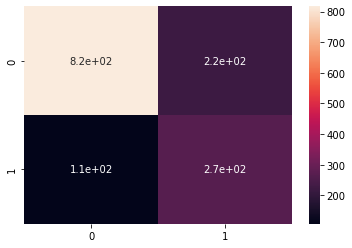

In [83]:
accuracy_dtree, precision_tree, recall_dtree, F1_dtree, F2_dtree, dtree_pred = evaluate_model(dtree, X_test_, y_test)

In [84]:
results = pd.DataFrame([['Decision Tree', accuracy_dtree, precision_tree, recall_dtree, F1_dtree, F2_dtree]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score'])
results

,Model,Accuracy,Precision,Recall,F1_score,F2_score
0,Decision Tree,0.76863,0.548454,0.713137,0.620047,0.672736


In [85]:
def get_features_importance(model, train_features, number_of_important_features=None, cutt_off_weight=0):
    '''This function displays the feature of importance graph for the tree models
    and returns the first 35 most important features
    '''
    fi = model.feature_importances_
    features_df = pd.DataFrame(fi, index=train_features.columns, columns=['Weight Of Importance'])
    features_df = features_df.sort_values(by='Weight Of Importance', ascending=False)
    features_df = (features_df[features_df['Weight Of Importance'] > cutt_off_weight])                                    
    if number_of_important_features is None:
        number_of_important_features = len(features_df)
    features_fi_cols = features_df.index.tolist()[:number_of_important_features]
    
    # plot graph for feature of importance
    plt.figure(figsize=(6,20))
    plt.barh(train_features.columns, fi)
    plt.show()
    return features_fi_cols, features_df


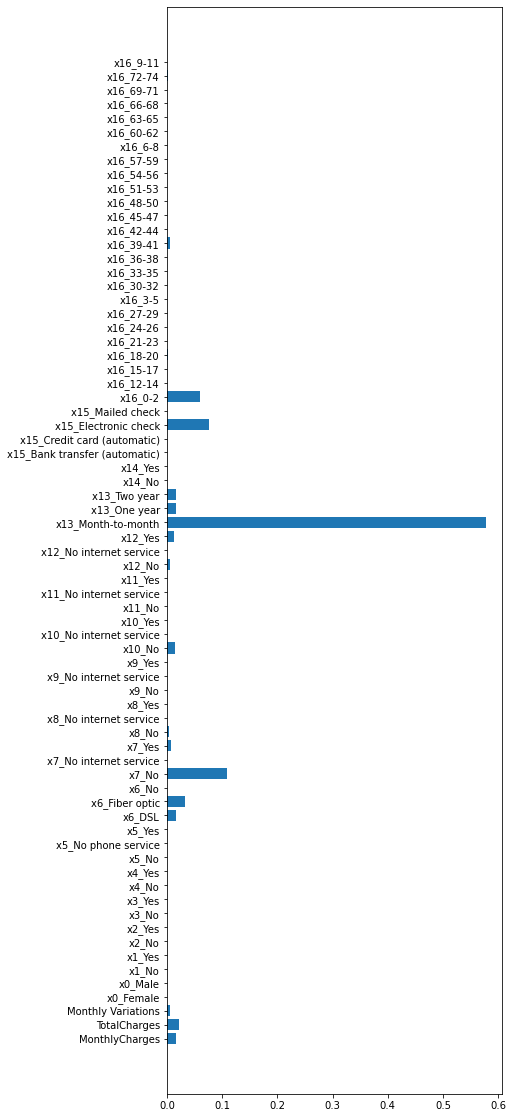

In [86]:
fi_dtree, fi_dtree_df = get_features_importance(dtree, X_train_)

In [87]:
len(fi_dtree)

21

In [88]:
fi_dtree_df

,Weight Of Importance
x13_Month-to-month,0.577350
x7_No,0.108818
x15_Electronic check,0.076202
x16_0-2,0.060030
x6_Fiber optic,0.032528
TotalCharges,0.021874
x6_DSL,0.016613
MonthlyCharges,0.016081
x13_One year,0.015876
x13_Two year,0.015844


### Train model with only features of Importance

In [89]:
# Get the only the feature with great importance
X_train_dfi = X_train_.loc[:, fi_dtree]
X_test_dfi = X_test_.loc[:, fi_dtree]

# print the shape to confirm and display the head of the new dataframe
print(X_train_dfi.shape)
X_train_dfi.head()

(8276, 21)


,x13_Month-to-month,x7_No,x15_Electronic check,x16_0-2,x6_Fiber optic,TotalCharges,x6_DSL,MonthlyCharges,x13_One year,x13_Two year,...,x12_Yes,x7_Yes,Monthly Variations,x12_No,x16_39-41,x8_No,x16_18-20,x16_72-74,x16_54-56,x16_24-26
0,0.0,0.0,0.0,0.0,0.0,-0.419925,1.0,-0.000474,1.0,0.0,...,1.0,1.0,-0.384915,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.256017,0.0,1.074754,0.0,1.0,...,1.0,0.0,-1.792327,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,1.0,1.0,0.0,-1.000283,1.0,-1.376499,0.0,0.0,...,0.0,0.0,-0.011048,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,-0.905497,0.0,0.177346,0.0,0.0,...,0.0,0.0,-0.650577,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,-1.010646,1.0,-0.098524,0.0,1.0,...,0.0,1.0,-0.011048,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
# create a second Decision tree model
dtree_2 = DecisionTreeClassifier(criterion='gini', random_state=100, min_samples_leaf=8, max_depth=6)

In [91]:
# Train the model
dtree_2.fit(X_train_dfi, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

classification report : 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1036
           1       0.55      0.71      0.62       373

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409

Cofusion matrix report : 
              0    1
Negatives  817  219
Positives  107  266


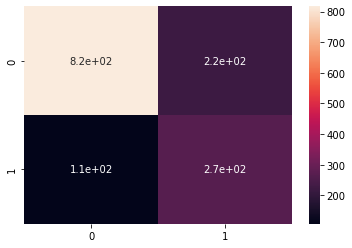

In [92]:
# get the acccuaracy, f1 score, recall, and precision
accuracy_dtree_2, precision_tree_2, recall_dtree_2, F1_dtree_2, F2_dtree_2, dtree_pred_2 = evaluate_model(dtree_2, X_test_dfi, y_test)

### Predict on a unknown dataset (Testset)

In [93]:
# Use .predict method # .predict_proba is available just for classification

In [94]:
model_result = pd.DataFrame([['Decision Tree(With only Features of Importance)', accuracy_dtree_2, precision_tree_2, recall_dtree_2, F1_dtree_2, F2_dtree_2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score'])
results = results.append(model_result)

In [95]:
results

,Model,Accuracy,Precision,Recall,F1_score,F2_score
0,Decision Tree,0.76863,0.548454,0.713137,0.620047,0.672736
0,Decision Tree(With only Features of Importance),0.76863,0.548454,0.713137,0.620047,0.672736


## Model 2 - Random Forest

### Create the Model

In [96]:
# Code here

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini', random_state=100, min_samples_leaf=8, max_depth=6, n_estimators=100)

### Train the Model

In [97]:
# Use the .fit method
rfc.fit(X_train_, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

### Evaluate the Model on the Evaluation dataset (Evalset)

classification report : 
               precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.79      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.81      0.77      0.78      1409

Cofusion matrix report : 
              0    1
Negatives  797  239
Positives   80  293


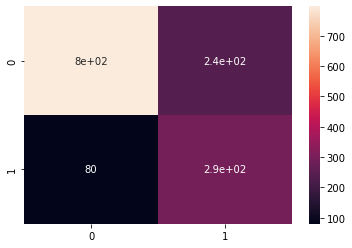

In [98]:
accuracy_rfc, precision_rfc, recall_rfc, F1_rfc, F2_rfc, rfc_pred = evaluate_model(rfc, X_test_, y_test)

In [99]:
model_results = pd.DataFrame([['Random Forest', accuracy_rfc, precision_rfc, recall_rfc, F1_rfc, F2_rfc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1_score,F2_score
0,Decision Tree,0.768630,0.548454,0.713137,0.620047,0.672736
1,Decision Tree(With only Features of Importance),0.768630,0.548454,0.713137,0.620047,0.672736
2,Random Forest,0.773598,0.550752,0.785523,0.647514,0.723814


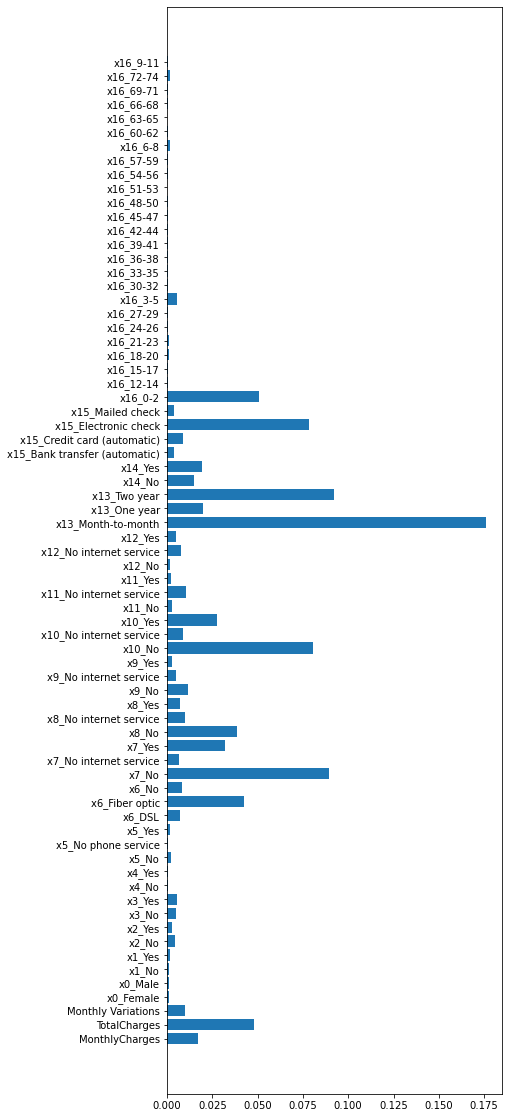

In [100]:
fi_rfc, fi_rfc_df = get_features_importance(rfc, X_train_, number_of_important_features=50)

In [101]:
len(fi_rfc)

50

In [102]:
fi_rfc_df

,Weight Of Importance
x13_Month-to-month,0.175926
x13_Two year,0.091994
x7_No,0.089530
x10_No,0.080332
x15_Electronic check,0.078359
...,...
x16_45-47,0.000336
x16_27-29,0.000330
x16_42-44,0.000327
x16_63-65,0.000242


### Model 3 - Train model with only features of Importance

In [103]:
X_train_rfi = X_train_.loc[:, fi_rfc]
X_test_rfi = X_test_.loc[:, fi_rfc]

print(X_train_rfi.shape)
X_train_rfi.head()

(8276, 50)


,x13_Month-to-month,x13_Two year,x7_No,x10_No,x15_Electronic check,x16_0-2,TotalCharges,x6_Fiber optic,x8_No,x7_Yes,...,x16_6-8,x1_Yes,x12_No,x16_72-74,x0_Male,x0_Female,x16_18-20,x1_No,x16_21-23,x16_9-11
0,0.0,0.0,0.0,1.0,0.0,0.0,-0.419925,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,1.256017,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,1.0,1.0,1.0,-1.000283,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,0.0,-0.905497,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,-1.010646,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [104]:
rfc_2 = RandomForestClassifier(criterion='gini', random_state=100, min_samples_leaf=8, max_depth=6, n_estimators=100)

In [105]:
rfc_2.fit(X_train_rfi, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

classification report : 
               precision    recall  f1-score   support

           0       0.90      0.78      0.84      1036
           1       0.55      0.77      0.64       373

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409

Cofusion matrix report : 
              0    1
Negatives  805  231
Positives   87  286


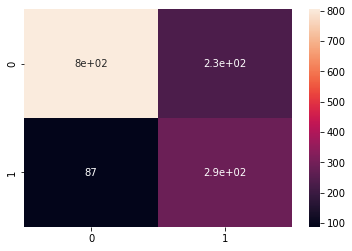

In [106]:
accuracy_rfc_2, precision_rfc_2, recall_rfc_2, F1_rfc_2, F2_rfc_2,  rfc_pred_2 = evaluate_model(rfc_2, X_test_rfi, y_test)

### Predict on a unknown dataset (Testset)

In [107]:
# Use .predict method # .predict_proba is available just for classification

In [108]:
model_results = pd.DataFrame([['Random Forest(With 50 features of Importance)', accuracy_rfc_2, precision_rfc_2, recall_rfc_2, F1_rfc_2, F2_rfc_2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

results = results.append(model_results, ignore_index = True)


In [109]:
results

,Model,Accuracy,Precision,Recall,F1_score,F2_score
0,Decision Tree,0.768630,0.548454,0.713137,0.620047,0.672736
1,Decision Tree(With only Features of Importance),0.768630,0.548454,0.713137,0.620047,0.672736
2,Random Forest,0.773598,0.550752,0.785523,0.647514,0.723814
3,Random Forest(With 50 features of Importance),0.774308,0.553191,0.766756,0.642697,0.711797


## Model 4 - Support Vector Machine

### Create the Model

In [110]:
# Create the svm  model
from sklearn import svm
svm = svm.SVC()

### Train the Model

In [111]:
# Use the .fit method
svm.fit(X_train_, y_train)

SVC()

### Evaluate the Model on the Evaluation dataset (Evalset)

classification report : 
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1036
           1       0.55      0.75      0.63       373

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409

Cofusion matrix report : 
              0    1
Negatives  806  230
Positives   95  278


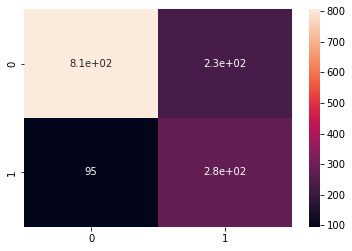

In [112]:
accuracy_svm, precision_svm, recall_svm, F1_svm, F2_svm, svm_pred = evaluate_model(svm, X_test_, y_test)

### Predict on a unknown dataset (Testset)

In [113]:
# Use .predict method # .predict_proba is available just for classification

In [114]:
model_results = pd.DataFrame([['Support Vector Machine', accuracy_svm, precision_svm, recall_svm, F1_svm, F2_svm]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

results = results.append(model_results, ignore_index = True)
results


,Model,Accuracy,Precision,Recall,F1_score,F2_score
0,Decision Tree,0.768630,0.548454,0.713137,0.620047,0.672736
1,Decision Tree(With only Features of Importance),0.768630,0.548454,0.713137,0.620047,0.672736
2,Random Forest,0.773598,0.550752,0.785523,0.647514,0.723814
3,Random Forest(With 50 features of Importance),0.774308,0.553191,0.766756,0.642697,0.711797
4,Support Vector Machine,0.769340,0.547244,0.745308,0.631101,0.695000


## Model 5 - LightGBM

### Create the Model

In [115]:
# Code here
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()

### Train the Model

In [116]:
# Use the .fit method
lgb_model.fit(X_train_, y_train)

LGBMClassifier()

### Evaluate the Model on the Evaluation dataset (Evalset)

classification report : 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.64      0.57      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.73      1409
weighted avg       0.79      0.80      0.80      1409

Cofusion matrix report : 
              0    1
Negatives  918  118
Positives  162  211


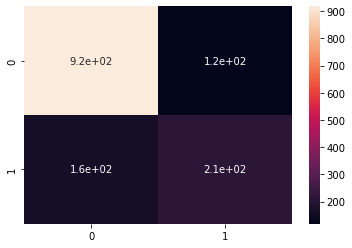

In [117]:
accuracy_lgb, precision_lbg, recall_lbg, F1_lgb, F2_lgb, lgb_pred = evaluate_model(lgb_model, X_test_, y_test)

### Predict on a unknown dataset (Testset)

In [118]:
# Use .predict method # .predict_proba is available just for classification

In [119]:
model_results = pd.DataFrame([['LightGBM Classifier', accuracy_lgb, precision_lbg, recall_lbg, F1_lgb, F2_lgb]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1_score,F2_score
0,Decision Tree,0.768630,0.548454,0.713137,0.620047,0.672736
1,Decision Tree(With only Features of Importance),0.768630,0.548454,0.713137,0.620047,0.672736
2,Random Forest,0.773598,0.550752,0.785523,0.647514,0.723814
3,Random Forest(With 50 features of Importance),0.774308,0.553191,0.766756,0.642697,0.711797
4,Support Vector Machine,0.769340,0.547244,0.745308,0.631101,0.695000
5,LightGBM Classifier,0.801278,0.641337,0.565684,0.601140,0.579352


## Model 6 - KNeighbors Classifier

### Create the Model

In [120]:
# Code here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

### Train the Model

In [121]:
# Use the .fit method
knn.fit(X_train_, y_train)

KNeighborsClassifier()

### Evaluate the Model on the Evaluation dataset (Evalset)

classification report : 
               precision    recall  f1-score   support

           0       0.90      0.65      0.75      1036
           1       0.45      0.81      0.58       373

    accuracy                           0.69      1409
   macro avg       0.68      0.73      0.67      1409
weighted avg       0.78      0.69      0.71      1409

Cofusion matrix report : 
              0    1
Negatives  669  367
Positives   72  301


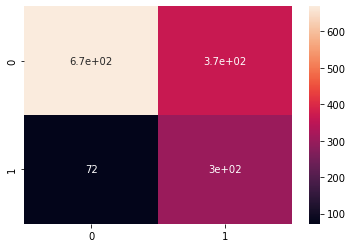

In [122]:
accuracy_knn, precision_knn, recall_knn, F1_knn, F2_knn, knn_pred = evaluate_model(knn, X_test_, y_test)

### Predict on a unknown dataset (Testset)

In [123]:
# Use .predict method # .predict_proba is available just for classification

In [124]:
model_results = pd.DataFrame([['KNearest Neighbors', accuracy_knn, precision_knn, recall_knn, F1_knn, F2_knn]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1_score,F2_score
0,Decision Tree,0.768630,0.548454,0.713137,0.620047,0.672736
1,Decision Tree(With only Features of Importance),0.768630,0.548454,0.713137,0.620047,0.672736
2,Random Forest,0.773598,0.550752,0.785523,0.647514,0.723814
3,Random Forest(With 50 features of Importance),0.774308,0.553191,0.766756,0.642697,0.711797
4,Support Vector Machine,0.769340,0.547244,0.745308,0.631101,0.695000
5,LightGBM Classifier,0.801278,0.641337,0.565684,0.601140,0.579352
6,KNearest Neighbors,0.688432,0.450599,0.806971,0.578290,0.696759


## Model 7 - XGBoost

Please, keep the following structure to try all the model you want.

### Create the Model

In [125]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

### Train the Model

In [126]:
# Use the .fit method
xgb_model.fit(X_train_, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Evaluate the Model on the Evaluation dataset (Evalset)

classification report : 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.62      0.57      0.59       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409

Cofusion matrix report : 
              0    1
Negatives  903  133
Positives  159  214


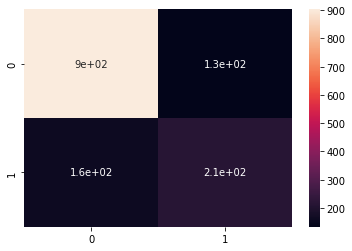

In [127]:
accuracy_xgb, precision_xgb, recall_xgb, F1_xgb, F2_xgb, xgb_pred = evaluate_model(xgb_model, X_test_, y_test)

### Predict on a unknown dataset (Testset)

In [128]:
# Use .predict method # .predict_proba is available just for classification

In [129]:
model_results = pd.DataFrame([['XGBoost Classifier', accuracy_xgb, precision_xgb, recall_xgb, F1_xgb, F2_xgb]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1_score,F2_score
0,Decision Tree,0.768630,0.548454,0.713137,0.620047,0.672736
1,Decision Tree(With only Features of Importance),0.768630,0.548454,0.713137,0.620047,0.672736
2,Random Forest,0.773598,0.550752,0.785523,0.647514,0.723814
3,Random Forest(With 50 features of Importance),0.774308,0.553191,0.766756,0.642697,0.711797
4,Support Vector Machine,0.769340,0.547244,0.745308,0.631101,0.695000
5,LightGBM Classifier,0.801278,0.641337,0.565684,0.601140,0.579352
6,KNearest Neighbors,0.688432,0.450599,0.806971,0.578290,0.696759
7,XGBoost Classifier,0.792761,0.616715,0.573727,0.594444,0.581838


## Model 8 - Gradient Boosting 

Please, keep the following structure to try all the model you want.

### Create the Model

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

### Train the Model

In [131]:
# Use the .fit method
gb_model.fit(X_train_, y_train)

GradientBoostingClassifier()

### Evaluate the Model on the Evaluation dataset (Evalset)

classification report : 
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      1036
           1       0.61      0.70      0.65       373

    accuracy                           0.80      1409
   macro avg       0.75      0.77      0.76      1409
weighted avg       0.81      0.80      0.81      1409

Cofusion matrix report : 
              0    1
Negatives  870  166
Positives  112  261


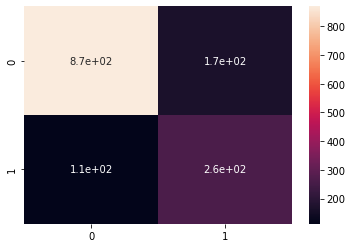

In [132]:
accuracy_gb, precision_gb, recall_gb, F1_gb, F2_gb, gb_pred = evaluate_model(gb_model, X_test_, y_test)

### Predict on a unknown dataset (Testset)

In [133]:
# Use .predict method # .predict_proba is available just for classification

In [134]:
model_results = pd.DataFrame([['Gradient Boosting Classifier',  accuracy_gb, precision_gb, recall_gb, F1_gb, F2_gb]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1_score,F2_score
0,Decision Tree,0.768630,0.548454,0.713137,0.620047,0.672736
1,Decision Tree(With only Features of Importance),0.768630,0.548454,0.713137,0.620047,0.672736
2,Random Forest,0.773598,0.550752,0.785523,0.647514,0.723814
3,Random Forest(With 50 features of Importance),0.774308,0.553191,0.766756,0.642697,0.711797
4,Support Vector Machine,0.769340,0.547244,0.745308,0.631101,0.695000
5,LightGBM Classifier,0.801278,0.641337,0.565684,0.601140,0.579352
6,KNearest Neighbors,0.688432,0.450599,0.806971,0.578290,0.696759
7,XGBoost Classifier,0.792761,0.616715,0.573727,0.594444,0.581838
8,Gradient Boosting Classifier,0.802697,0.611241,0.699732,0.652500,0.680042


## Model 9 - Stochastic Gradient Boosting

### Create the Model

In [135]:
from sklearn.linear_model import SGDClassifier
sgd_model = XGBClassifier()

### Train the Model

In [136]:
# Use the .fit method
sgd_model.fit(X_train_, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Evaluate the Model on the Evaluation dataset (Evalset)

classification report : 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.62      0.57      0.59       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409

Cofusion matrix report : 
              0    1
Negatives  903  133
Positives  159  214


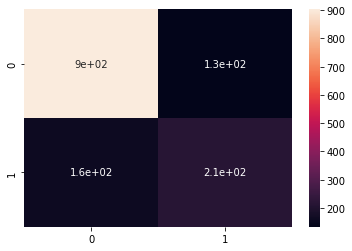

In [137]:
accuracy_sgd, precision_sgd, recall_sgd, F1_sgd, F2_sgd, sgd_pred = evaluate_model(sgd_model, X_test_, y_test)

### Predict on a unknown dataset (Testset)

In [138]:
# Use .predict method # .predict_proba is available just for classification

In [139]:
model_results = pd.DataFrame([['Stochastic Gradient Classifier', accuracy_sgd, precision_sgd, recall_sgd, F1_sgd, F2_sgd]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score'])
results = results.append(model_results, ignore_index = True)
results =  results.sort_values(by='F1_score', ascending=False)
results

,Model,Accuracy,Precision,Recall,F1_score,F2_score
8,Gradient Boosting Classifier,0.802697,0.611241,0.699732,0.652500,0.680042
2,Random Forest,0.773598,0.550752,0.785523,0.647514,0.723814
3,Random Forest(With 50 features of Importance),0.774308,0.553191,0.766756,0.642697,0.711797
4,Support Vector Machine,0.769340,0.547244,0.745308,0.631101,0.695000
0,Decision Tree,0.768630,0.548454,0.713137,0.620047,0.672736
1,Decision Tree(With only Features of Importance),0.768630,0.548454,0.713137,0.620047,0.672736
5,LightGBM Classifier,0.801278,0.641337,0.565684,0.601140,0.579352
7,XGBoost Classifier,0.792761,0.616715,0.573727,0.594444,0.581838
9,Stochastic Gradient Classifier,0.792761,0.616715,0.573727,0.594444,0.581838
6,KNearest Neighbors,0.688432,0.450599,0.806971,0.578290,0.696759


## Model 10 - Logistic Regression

Please, keep the following structure to try all the model you want.

### Create the Model

In [140]:
from sklearn.linear_model import LogisticRegression
lgr_model = LogisticRegression()

### Train the Model

In [141]:
# Use the .fit method
lgr_model.fit(X_train_, y_train)

LogisticRegression()

### Evaluate the Model on the Evaluation dataset (Evalset)

classification report : 
               precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409

Cofusion matrix report : 
              0    1
Negatives  755  281
Positives   64  309


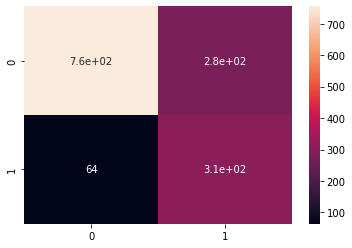

In [142]:
accuracy_lgr, precision_lgr, recall_lgr, F1_lgr, F2_lgr, lgr_pred = evaluate_model(lgr_model, X_test_, y_test)

### Predict on a unknown dataset (Testset)

In [143]:
# Use .predict method # .predict_proba is available just for classification

In [144]:
model_results = pd.DataFrame([['Logistic Regression Classifier', accuracy_lgr, precision_lgr, recall_lgr, F1_lgr, F2_lgr]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

results = results.append(model_results, ignore_index = True)
results =  results.sort_values(by='F1_score', ascending=False)
results

,Model,Accuracy,Precision,Recall,F1_score,F2_score
0,Gradient Boosting Classifier,0.802697,0.611241,0.699732,0.652500,0.680042
1,Random Forest,0.773598,0.550752,0.785523,0.647514,0.723814
2,Random Forest(With 50 features of Importance),0.774308,0.553191,0.766756,0.642697,0.711797
10,Logistic Regression Classifier,0.755145,0.523729,0.828418,0.641745,0.742075
3,Support Vector Machine,0.769340,0.547244,0.745308,0.631101,0.695000
4,Decision Tree,0.768630,0.548454,0.713137,0.620047,0.672736
5,Decision Tree(With only Features of Importance),0.768630,0.548454,0.713137,0.620047,0.672736
6,LightGBM Classifier,0.801278,0.641337,0.565684,0.601140,0.579352
7,XGBoost Classifier,0.792761,0.616715,0.573727,0.594444,0.581838
8,Stochastic Gradient Classifier,0.792761,0.616715,0.573727,0.594444,0.581838


## Models comparison
Create a pandas dataframe that will allow you to compare your models.



In [194]:
#Comparing models and sorting by F2 score


results =  results.sort_values(by='F2_score', ascending=False)
results.set_index('Model', inplace =True)
results

,Accuracy,Precision,Recall,F1_score,F2_score
Model,,,,,
Logistic Regression Classifier,0.755145,0.523729,0.828418,0.641745,0.742075
Random Forest,0.773598,0.550752,0.785523,0.647514,0.723814
Random Forest(With 50 features of Importance),0.774308,0.553191,0.766756,0.642697,0.711797
KNearest Neighbors,0.688432,0.450599,0.806971,0.578290,0.696759
Support Vector Machine,0.769340,0.547244,0.745308,0.631101,0.695000
Gradient Boosting Classifier,0.802697,0.611241,0.699732,0.652500,0.680042
Decision Tree,0.768630,0.548454,0.713137,0.620047,0.672736
Decision Tree(With only Features of Importance),0.768630,0.548454,0.713137,0.620047,0.672736
XGBoost Classifier,0.792761,0.616715,0.573727,0.594444,0.581838


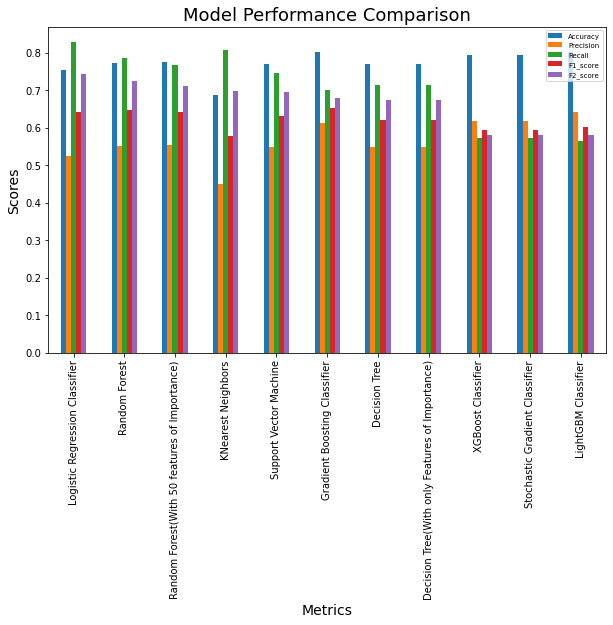

In [195]:
# plot the bar chart
ax = results.plot(kind='bar', figsize=(10, 6))

# set the title and labels
ax.set_title('Model Performance Comparison', fontsize=18)
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)

# set the legend
ax.legend(fontsize=7)

# show the plot
plt.show()

Training the various models with F2 score as the metric of interest following were observed:
>- The Logistic Regression Classifier topped the list with a score of 0.701797.

>- The next was the Gradient Boosting Classifier with a score of 0.669869.

>- The Support Vector Machine followed third with a score of 0.660949.

>- With LightGBM having a score of 0.655738.

>- The best performing model so far was the Logistic Regression Classifier.

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

>- Hyperparameter tuning will be performed on these models: Logistic Regression Classifier, Gradient Boosting Classifier, Support Vector Machine and LightGBM.

In [146]:
from sklearn.metrics import SCORERS

In [147]:
# make f2 a scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

### Hyperparameter Tuning on Logistic Regression Classifier

In [180]:
# Define the hyperparameters to tune
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 500, 1000],
}

In [181]:
#Define F2 score as the evaluation metric
from sklearn.metrics import make_scorer, fbeta_score
f2_scorer = make_scorer(fbeta_score, beta=2)

In [198]:
# Search for the best hyperparameters
grid_search = GridSearchCV(lgr_model, params, cv=5, verbose=1, scoring=f2_scorer)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters combination
print("Best Hyperparameters Combination:\n")

ValueError: Found input variables with inconsistent numbers of samples: [5634, 8276]

In [197]:
print("Best Parameters: ", grid_search.best_params_)
print("Best F2 Score: ", grid_search.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

### Model Tuning for Gradient Boosting Classifier

In [205]:
# This are the parameters to tested model 
param_grid_gb = {
    'min_samples_split': [200, 85, 108, 500, 800],
    'loss': ['deviance', 'exponential'],
    'learning_rate': np.arange(0.1,1,0.1),
    'min_samples_leaf': [60, 40, 35],
    'n_estimators': [100, 150, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [8, 9, 12, 6],
    'ccp_alpha': [0.3, 0.5]
}

In [206]:
# create a bayessearchcv to finetune the Gradient Boosting Classifier regression model

gb_bayes_search = BayesSearchCV(gb_model,param_grid_gb, scoring=f2_scorer, cv=5, return_train_score=True)

NameError: name 'BayesSearchCV' is not defined

In [207]:
# train the model
gb_bayes_search.fit(X_train_, y_train)

NameError: name 'gb_bayes_search' is not defined

In [208]:
# get the best estimator
gb_bayes_search.best_estimator_

NameError: name 'gb_bayes_search' is not defined

In [209]:
accuracy_gb_tuned, precision_gb_tuned, recall_gb_tuned, F1_gb_tuned, F2_gb_tuned, gb_pred_tuned\
= evaluate_model(gb_bayes_search.best_estimator_, X_test_, y_test)

NameError: name 'gb_bayes_search' is not defined

In [210]:
tuned_gb = pd.DataFrame([['Gradient Boosting Classifier', accuracy_gb_tuned, precision_gb_tuned, recall_gb_tuned, F1_gb_tuned, F2_gb_tuned\
]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])
tuned_results_bcv = tuned_results_bcv.append(tuned_gb)

NameError: name 'accuracy_gb_tuned' is not defined

In [211]:
tuned_results_bcv

NameError: name 'tuned_results_bcv' is not defined

### Model Tuning for Support  Vector Machine Classifier

In [212]:
param_grid_svm= [{'C': [0.01,5, 6, 8, 8.6,10,25], 'gamma':[ 'scale', 'auto'],\
              'max_iter': [100, 200, 400, 1000, 5000], 'class_weight':['balanced'], \
              'kernel':['sigmoid', 'poly'], 'probability': [True], 'random_state': [126, 42, 90], \
              'tol': 10.0 ** -np.arange(1, 7), 'coef0':np.arange(0,1,0.3) }]

In [213]:
# create a bayessearchcv to finetune the Support Vectors Machines regression model

svm_bayes_search = BayesSearchCV(svm,param_grid_svm, scoring=f2_scorer, cv=5, return_train_score=True)

NameError: name 'BayesSearchCV' is not defined

In [214]:
# train the model
svm_bayes_search.fit(X_train_, y_train)

NameError: name 'svm_bayes_search' is not defined

In [215]:
# get the bbest eestimator
svm_bayes_search.best_estimator_

NameError: name 'svm_bayes_search' is not defined

In [216]:
accuracy_svm_tuned, precision_svm_tuned, recall_svm_tuned, F1_svm_tuned, F2_svm_tuned, svm_pred_tuned\
= evaluate_model(svm_bayes_search.best_estimator_, X_test_, y_test)

NameError: name 'svm_bayes_search' is not defined

In [217]:
tuned_svm = pd.DataFrame([['Support Vector Machine', accuracy_svm_tuned, precision_svm_tuned, recall_svm_tuned, F1_svm_tuned, F2_svm_tuned\
]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])
tuned_results_bcv = tuned_results_bcv.append(tuned_svm)

NameError: name 'accuracy_svm_tuned' is not defined

In [218]:
tuned_results_bcv

NameError: name 'tuned_results_bcv' is not defined

### Model Tuning for Random Forest Classifier

In [219]:
# Create the parameter bayes search 
param_grid_rfc = {
    'bootstrap': [True], 
    'max_features': [2, 3, 9], 
    'min_samples_split': [8, 10, 12], 
    'n_estimators': [100, 200, 300, 1000], 
    'random_state':[100,  120, 150], 
    'min_samples_leaf':[8, 6, 10, 7],
    'max_depth': [6, 8, 9, 80, 90, 100]
}

In [220]:
# create a bayessearchcv to finetune the Support Vectors Machines regression model

rfc_bayes_search = BayesSearchCV(rfc_2, param_grid_rfc, scoring=f2_scorer, cv=5, return_train_score=True)

NameError: name 'BayesSearchCV' is not defined

In [221]:
# train the model
rfc_bayes_search.fit(X_train_rfi, y_train)

NameError: name 'rfc_bayes_search' is not defined

In [222]:
# get the bbest eestimator
rfc_bayes_search.best_estimator_

NameError: name 'rfc_bayes_search' is not defined

In [223]:
accuracy_rfc_tuned, precision_rfc_tuned, recall_rfc_tuned, F1_rfc_tuned, F2_rfc_tuned, rfc_pred_tuned\
= evaluate_model(rfc_bayes_search.best_estimator_, X_test_rfi, y_test)

NameError: name 'rfc_bayes_search' is not defined

In [224]:
tuned_rfc= pd.DataFrame([['Random Forest Classifier', accuracy_rfc_tuned, precision_rfc_tuned, recall_rfc_tuned, F1_rfc_tuned, F2_rfc_tuned, rfc_pred_tuned\
]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])
tuned_results_bcv = tuned_results_bcv.append(tuned_rfc)

NameError: name 'accuracy_rfc_tuned' is not defined

It's there doing well in predicting customers who churn. This means that since F2_score gives more weight to recall, the model is doing well in predicting correctly the number of actual positive cases which in our case is the 'Yes' (Churn).

Finally, it can be concluded that the Logistic Regression Model is best in predicting customer churn 'Yes' by 71%.

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [225]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app

In [202]:
import pickle
# Getting key components of the logistic regression  model
model = "Logistic Regression"
F2_score = 0.80
params = {'C': 0.001, 'solver': 'liblinear'}

In [203]:
# Put the key components in a dictionary
model_dict = {"model": model, "F2_score": F2_score, "params": params}

# Save the dictionary as a pickle file
with open("model.pkl", "wb") as f:
    pickle.dump(model_dict, f)

In [204]:
#downloading all requirements used
!pip3 freeze > requirements.txt 